In [1]:
using WAV
using FileIO
using DSP

INFO: Recompiling stale cache file /Users/rdeits/.julia/lib/v0.5/WAV.ji for module WAV.
INFO: Recompiling stale cache file /Users/rdeits/.julia/lib/v0.5/DSP.ji for module DSP.


In [8]:
include("vinyl.jl")

vinyl

In [2]:
const rpm = 33

33

In [7]:
samples, Fs, nbits, opt  = wavread("audio/combined.wav")
samples = samples[:,1];

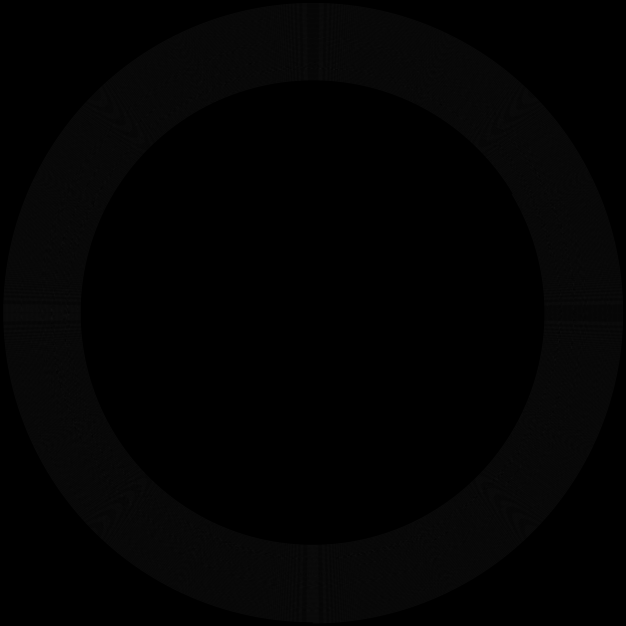

In [14]:
im = vinyl.cut_record(samples, Fs, rpm, 2500)

In [18]:
Fs_play = 16000
recovered = vinyl.play_record(im, Fs_play, rpm, 0, 5);
wavwrite(recovered, "recovered.wav", Fs=Fs_play)
filtered = filt(digitalfilter(Lowpass(2000, fs=Fs_play), Butterworth(1)), recovered);
wavwrite(filtered, "bei_mir_filtered.wav", Fs=Fs_play)

In [11]:
save("bei_mir.png", im)

In [12]:
recovered = vinyl.play_record(load("bei_mir.png"), Fs_play, rpm, 0, 5)
wavwrite(recovered, "bei_mir.wav", Fs=Fs_play);

In [ ]:
s2, Fs2, _, _s  = wavread("/Users/rdeits/Music/iTunes/iTunes\ Music/M.I.A_/Kala/11\ Paper\ Planes.wav")
s2 = s2[:,1];

In [32]:
im2 = vinyl.cut_record(s2, Fs2, 330, 5000);

In [35]:
recovered = vinyl.play_record(im2 .+ im, Fs_play, 33, 0, 5);
wavwrite(recovered, "combined.wav", Fs=Fs_play)